In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
# from NLP lecture notebook
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

#downloading additional methods
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lhamutsering/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lhamutsering/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lhamutsering/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# !pip install wordcloud

In [3]:
# !pip install textblob

In [3]:
df = pd.read_csv("./data/reddit_vm.csv")

In [4]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [7]:
df.tail()

,title,score,id,url,comms_num,created,body,timestamp
1419,Comment,1,ejackaa,NaN,0,1.553486e+09,I didn't say thimerosal is mercury. I said thi...,2019-03-25 05:50:41
1420,Comment,2,ejacj98,NaN,0,1.553486e+09,"The ""myth"" you're debunking is in regards to t...",2019-03-25 05:50:20
1421,Comment,2,ejabpdx,NaN,0,1.553485e+09,You'll have to read it again because I didn't ...,2019-03-25 05:40:03
1422,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21
1423,Comment,1,ej9x2qr,NaN,0,1.553474e+09,"When they say there's no thimerasol, they mean...",2019-03-25 02:35:47


March 25 2019 to Feb 27 2021

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1424 non-null   object 
 1   score      1424 non-null   int64  
 2   id         1424 non-null   object 
 3   url        444 non-null    object 
 4   comms_num  1424 non-null   int64  
 5   created    1424 non-null   float64
 6   body       1059 non-null   object 
 7   timestamp  1424 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 89.1+ KB


In [6]:
df.isnull().sum()

title          0
score          0
id             0
url          980
comms_num      0
created        0
body         365
timestamp      0
dtype: int64

There are a total of 1424 observations and 8 features in total. Some of the rows are missing url and body data.

In [8]:
# reviewing the data in the title
for t in df["title"].dropna():
    print(t)

Health Canada approves AstraZeneca COVID-19 vaccine
COVID-19 in Canada: 'Vaccination passports' a near certainty says bio-ethicist
Coronavirus variants could fuel Canada's third wave
Canadian government to extend COVID-19 emergency benefits
Canada: Pfizer is 'extremely committed' to meeting vaccine delivery targets
Canada: Oxford-AstraZeneca vaccine approval expected this week
Comment
COVID-19: Músicos que han recibido la vacuna
Now Casting COVID-19 Vaccine Volunteers, Freezer Truck Drivers, and Others!
Beer after corona vaccination
Waiting for vaccine
A great article: myths vs facts of the Covid vaccine
Vietnam's Covid-19 vaccine, Nanocovax effective on variants: university 'Vietnam is currently working on four Covid-19 vaccines produced by Nanogen, the Institute of Vaccines and Medical Biologicals..'
Pertussis
Sobre las vacunas para el COVID19, compilación de textos científicos y opinión personal.
If someone tells you the vaccine contains a microchip, ask them what would be the point

In [18]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [20]:
text = " ". join(t for t in df['title'])

In [21]:
tokenized_review = tokenizer.tokenize(text)

In [23]:
print(tokenized_review)

['Health', 'Canada', 'approves', 'AstraZeneca', 'COVID', '19', 'vaccine', 'COVID', '19', 'in', 'Canada', 'Vaccination', 'passports', 'a', 'near', 'certainty', 'says', 'bio', 'ethicist', 'Coronavirus', 'variants', 'could', 'fuel', 'Canada', 's', 'third', 'wave', 'Canadian', 'government', 'to', 'extend', 'COVID', '19', 'emergency', 'benefits', 'Canada', 'Pfizer', 'is', 'extremely', 'committed', 'to', 'meeting', 'vaccine', 'delivery', 'targets', 'Canada', 'Oxford', 'AstraZeneca', 'vaccine', 'approval', 'expected', 'this', 'week', 'Comment', 'COVID', '19', 'M', 'sicos', 'que', 'han', 'recibido', 'la', 'vacuna', 'Now', 'Casting', 'COVID', '19', 'Vaccine', 'Volunteers', 'Freezer', 'Truck', 'Drivers', 'and', 'Others', 'Beer', 'after', 'corona', 'vaccination', 'Waiting', 'for', 'vaccine', 'A', 'great', 'article', 'myths', 'vs', 'facts', 'of', 'the', 'Covid', 'vaccine', 'Vietnam', 's', 'Covid', '19', 'vaccine', 'Nanocovax', 'effective', 'on', 'variants', 'university', 'Vietnam', 'is', 'currentl

In [26]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 2580 samples and 8734 outcomes>


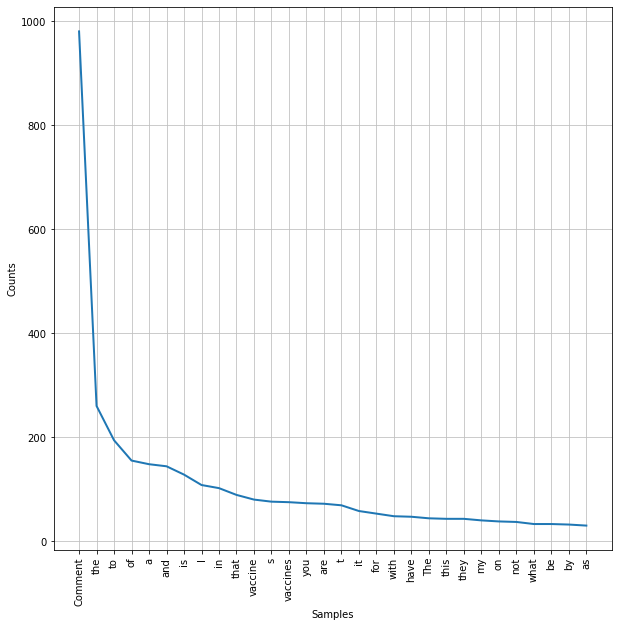

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [29]:
stop_words=set(stopwords.words("english"))
#creating a filtered review list by removing the stop words
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
print("Filterd Sentence:",filtered_review)
#a capital letter I is treated not treated as a stop word
#important to turn everything to lower case letters

Filterd Sentence: ['Health', 'Canada', 'approves', 'AstraZeneca', 'COVID', '19', 'vaccine', 'COVID', '19', 'Canada', 'Vaccination', 'passports', 'near', 'certainty', 'says', 'bio', 'ethicist', 'Coronavirus', 'variants', 'could', 'fuel', 'Canada', 'third', 'wave', 'Canadian', 'government', 'extend', 'COVID', '19', 'emergency', 'benefits', 'Canada', 'Pfizer', 'extremely', 'committed', 'meeting', 'vaccine', 'delivery', 'targets', 'Canada', 'Oxford', 'AstraZeneca', 'vaccine', 'approval', 'expected', 'week', 'Comment', 'COVID', '19', 'M', 'sicos', 'que', 'han', 'recibido', 'la', 'vacuna', 'Now', 'Casting', 'COVID', '19', 'Vaccine', 'Volunteers', 'Freezer', 'Truck', 'Drivers', 'Others', 'Beer', 'corona', 'vaccination', 'Waiting', 'vaccine', 'A', 'great', 'article', 'myths', 'vs', 'facts', 'Covid', 'vaccine', 'Vietnam', 'Covid', '19', 'vaccine', 'Nanocovax', 'effective', 'variants', 'university', 'Vietnam', 'currently', 'working', 'four', 'Covid', '19', 'vaccines', 'produced', 'Nanogen', 'Ins

In [30]:
print(len(tokenized_review))
print(len(filtered_review))

8734
5748


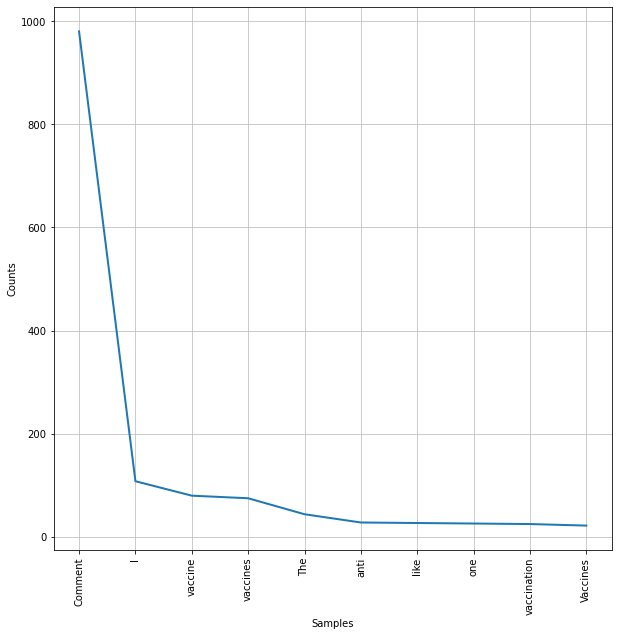

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

In [32]:
# Stemming
from nltk.stem import PorterStemmer

In [33]:
ps = PorterStemmer()

stemmed_review=[]
for w in filtered_review:
    stemmed_review.append(ps.stem(w))

print(stemmed_review)

['health', 'canada', 'approv', 'astrazeneca', 'covid', '19', 'vaccin', 'covid', '19', 'canada', 'vaccin', 'passport', 'near', 'certainti', 'say', 'bio', 'ethicist', 'coronaviru', 'variant', 'could', 'fuel', 'canada', 'third', 'wave', 'canadian', 'govern', 'extend', 'covid', '19', 'emerg', 'benefit', 'canada', 'pfizer', 'extrem', 'commit', 'meet', 'vaccin', 'deliveri', 'target', 'canada', 'oxford', 'astrazeneca', 'vaccin', 'approv', 'expect', 'week', 'comment', 'covid', '19', 'M', 'sico', 'que', 'han', 'recibido', 'la', 'vacuna', 'now', 'cast', 'covid', '19', 'vaccin', 'volunt', 'freezer', 'truck', 'driver', 'other', 'beer', 'corona', 'vaccin', 'wait', 'vaccin', 'A', 'great', 'articl', 'myth', 'vs', 'fact', 'covid', 'vaccin', 'vietnam', 'covid', '19', 'vaccin', 'nanocovax', 'effect', 'variant', 'univers', 'vietnam', 'current', 'work', 'four', 'covid', '19', 'vaccin', 'produc', 'nanogen', 'institut', 'vaccin', 'medic', 'biolog', 'pertussi', 'sobr', 'la', 'vacuna', 'para', 'el', 'covid19'

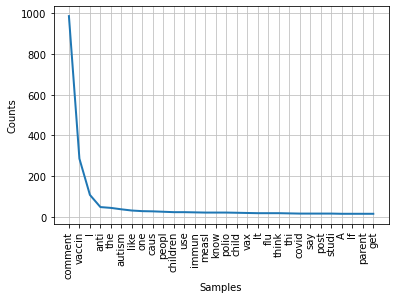

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

In [35]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [36]:
# we can also lemmatize our original reviews
lemmatized_review=[]
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))

print(lemmatized_review)
# lemming will not recognize spelling mistakes

['Health', 'Canada', 'approves', 'AstraZeneca', 'COVID', '19', 'vaccine', 'COVID', '19', 'Canada', 'Vaccination', 'passport', 'near', 'certainty', 'say', 'bio', 'ethicist', 'Coronavirus', 'variant', 'could', 'fuel', 'Canada', 'third', 'wave', 'Canadian', 'government', 'extend', 'COVID', '19', 'emergency', 'benefit', 'Canada', 'Pfizer', 'extremely', 'committed', 'meeting', 'vaccine', 'delivery', 'target', 'Canada', 'Oxford', 'AstraZeneca', 'vaccine', 'approval', 'expected', 'week', 'Comment', 'COVID', '19', 'M', 'sicos', 'que', 'han', 'recibido', 'la', 'vacuna', 'Now', 'Casting', 'COVID', '19', 'Vaccine', 'Volunteers', 'Freezer', 'Truck', 'Drivers', 'Others', 'Beer', 'corona', 'vaccination', 'Waiting', 'vaccine', 'A', 'great', 'article', 'myth', 'v', 'fact', 'Covid', 'vaccine', 'Vietnam', 'Covid', '19', 'vaccine', 'Nanocovax', 'effective', 'variant', 'university', 'Vietnam', 'currently', 'working', 'four', 'Covid', '19', 'vaccine', 'produced', 'Nanogen', 'Institute', 'Vaccines', 'Medica

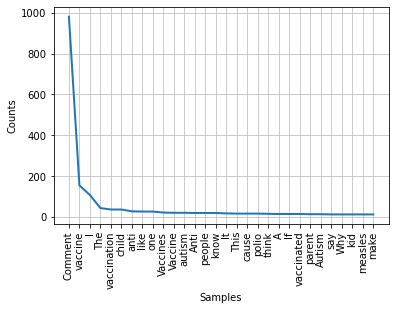

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
fdist = FreqDist(lemmatized_review)
fdist.plot(30)

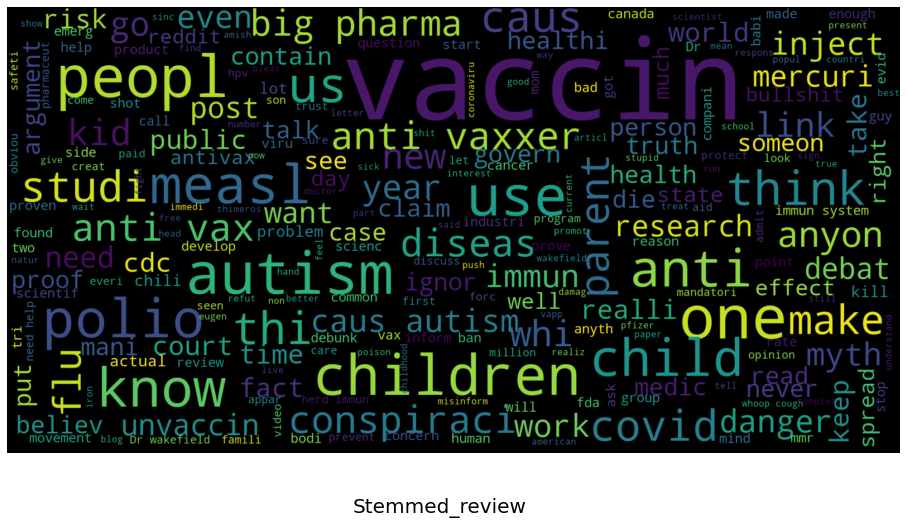

In [43]:
text = " ".join(t for t in stemmed_review)
stopwords = set(STOPWORDS)
stopwords.update(['the', "it", "if","say", "A","I","t", "co", "https", "amp", "U", "fuck", "fucking", "Comment", "vaccination", "vaccine", "vaccines", "vaccinate", "vaccinated"])
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
fig = plt.figure(1, figsize=(16,16))
plt.axis('off')
fig.suptitle("Stemmed_review", fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

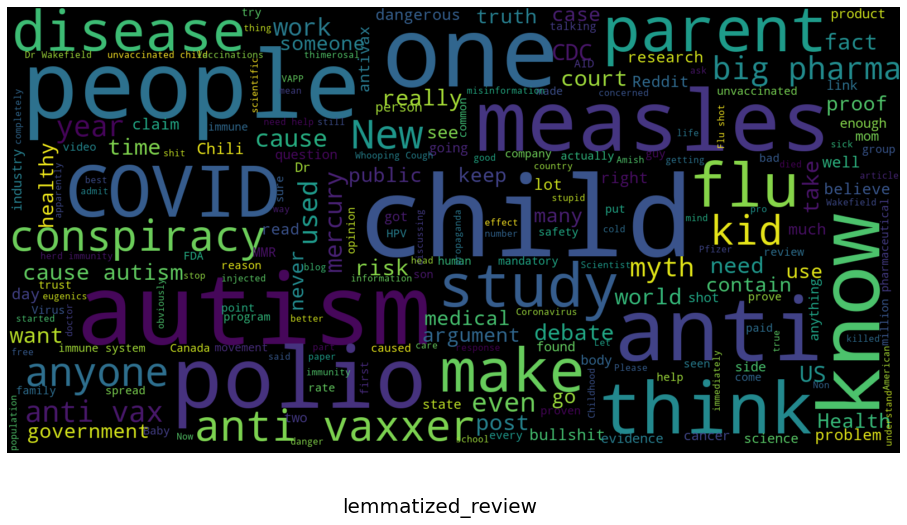

In [42]:
text = " ".join(t for t in lemmatized_review)
stopwords = set(STOPWORDS)
stopwords.update(['the', "it", "if","say", "A","I","t", "co", "https", "amp", "U", "fuck", "fucking", "shit", "Comment", "vaccination", "vaccine", "vaccines", "vaccinate", "vaccinated"])
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
fig = plt.figure(1, figsize=(16,16))
plt.axis('off')
fig.suptitle("lemmatized_review", fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [8]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking", "Comment", "vaccination", "vaccine", "vaccines", "vaccinate", "vaccinated"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [10]:
from wordcloud import STOPWORDS

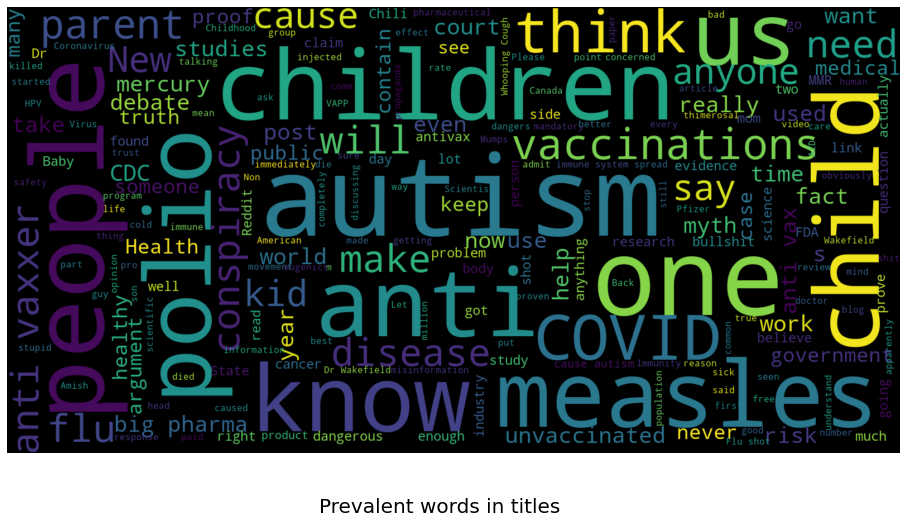

In [11]:
show_wordcloud(df['title'], title = 'Prevalent words in titles')